# Exploratory Data Analysis
- Import Data
- Light Data Cleaning
- Correlation Visualizations
- General Visualization + Analysis
- Local Machine analysis

## Importing Data

In [36]:
# Mount Drive, Data is saved on my google drive account
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import ipaddress
import os
import pytz # Date time from UTC to PDT
import hashlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize some colors
R = "\033[91m"  # Red text
W = "\033[0m"   # Reset to default
G = "\033[92m"  # Green text

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Initialize Root directory and path to pickle
PROJECT_ROOT = '/content/drive/MyDrive/IDS'
PATH = os.path.join(PROJECT_ROOT, "pkl")
DATA_PATH = os.path.join(PROJECT_ROOT, 'data/data.pkl')

In [38]:
# Load Data
try:
  data = pd.read_pickle(DATA_PATH)
  print(f'{G} Data Loaded! {W}')
except:
  print(f'{R} Data Not Found! {W}')
data.info()

 Data Loaded! 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243021 entries, 0 to 1243020
Data columns (total 22 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1243021 non-null  float64
 1   uid             1243021 non-null  object 
 2   src_ip          1243021 non-null  object 
 3   src_p           1243021 non-null  int64  
 4   dst_ip          1243021 non-null  object 
 5   dst_p           1243021 non-null  int64  
 6   proto           1243021 non-null  object 
 7   service         1243021 non-null  object 
 8   duration        1243021 non-null  object 
 9   src_bytes       1243021 non-null  object 
 10  dst_bytes       1243021 non-null  object 
 11  conn_state      1243021 non-null  object 
 12  local_orig      1243021 non-null  object 
 13  local_resp      1243021 non-null  object 
 14  missed_bytes    1243021 non-null  int64  
 15  history         1243021 non-null  object 
 16  orig_pkts       12430

## Data Cleaning
* Set data types
* Check for NaN and Null values
* Drop columns for distribution visualizations

In [39]:
# Simple cleaning
# data.isnull().sum() # Zero is null
# data.isna().sum() # Zero is na
def visualization_clean(df):

    # SO IMPORTANT so pandas resets index whenever it wants i guess...
    if df.index.name == 'ts' or 'ts' not in df.columns:
        df = df.reset_index()

    # Change ts to datetime and to PDT
    df['ts'] = pd.to_datetime(df['ts'], unit='s')
    df['ts'] = df['ts'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
    df.set_index('ts', inplace=True)

    # Data Type Assignment
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Convert duration to numeric (coerce invalid values to NaN)
    df['src_bytes'] = pd.to_numeric(df['src_bytes'], errors='coerce')  # Convert orig_bytes to numeric
    df['dst_bytes'] = pd.to_numeric(df['dst_bytes'], errors='coerce')  # Convert resp_bytes to numeric
    df['orig_pkts'] = pd.to_numeric(df['orig_pkts'], errors='coerce')  # Convert orig_pkts to numeric
    df['resp_pkts'] = pd.to_numeric(df['resp_pkts'], errors='coerce')  # Convert resp_pkts to numeric
    df['orig_ip_bytes'] = pd.to_numeric(df['orig_ip_bytes'], errors='coerce')  # Convert orig_ip_bytes to numeric
    df['resp_ip_bytes'] = pd.to_numeric(df['resp_ip_bytes'], errors='coerce')  # Convert resp_ip_bytes to numeric
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Convert duration to numeric

    return df
print('data.info()')
print(data.info())
print('data.describe()')
print(data.describe())
print('data.isna().sum()')
print(data.isna().sum())
print('data.isnull().sum()')
print(data.isnull().sum())
print('data.value_counts()')
print(data.value_counts())
v_data = visualization_clean(data)
v_data = v_data.reset_index()
print('v_data.info()')
v_data.info()

data.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243021 entries, 0 to 1243020
Data columns (total 22 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1243021 non-null  float64
 1   uid             1243021 non-null  object 
 2   src_ip          1243021 non-null  object 
 3   src_p           1243021 non-null  int64  
 4   dst_ip          1243021 non-null  object 
 5   dst_p           1243021 non-null  int64  
 6   proto           1243021 non-null  object 
 7   service         1243021 non-null  object 
 8   duration        1243021 non-null  object 
 9   src_bytes       1243021 non-null  object 
 10  dst_bytes       1243021 non-null  object 
 11  conn_state      1243021 non-null  object 
 12  local_orig      1243021 non-null  object 
 13  local_resp      1243021 non-null  object 
 14  missed_bytes    1243021 non-null  int64  
 15  history         1243021 non-null  object 
 16  orig_pkts       1243021 

In [40]:
# Lets look at tunnel parents
# v_data['tunnel_parents'].value_counts()
# Yieled all rows '-'
if 'tunnel_parents' in v_data.columns:
  v_data['tunnel_parents']
  v_data['tunnel_parents'].value_counts()
  v_data = v_data.drop(columns=['tunnel_parents'])
else:
  print(v_data.columns)
v_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243021 entries, 0 to 1243020
Data columns (total 21 columns):
 #   Column         Non-Null Count    Dtype                     
---  ------         --------------    -----                     
 0   ts             1243021 non-null  datetime64[ns, US/Pacific]
 1   uid            1243021 non-null  object                    
 2   src_ip         1243021 non-null  object                    
 3   src_p          1243021 non-null  int64                     
 4   dst_ip         1243021 non-null  object                    
 5   dst_p          1243021 non-null  int64                     
 6   proto          1243021 non-null  object                    
 7   service        1243021 non-null  object                    
 8   duration       1016313 non-null  float64                   
 9   src_bytes      1016313 non-null  float64                   
 10  dst_bytes      1016313 non-null  float64                   
 11  conn_state     1243021 non-null  obje

In [41]:
# Create a new df dropping ip's, history, ports, uid, conn_state, local_orig, local_resp, history, ts

def drop_categorical(df):
  temp = df.drop(columns=['src_ip', 'uid', 'dst_ip', 'proto', 'service', 'conn_state', 'local_orig', 'local_resp', 'history', 'ts'])
  return temp
n_data = drop_categorical(v_data)
n_data

,src_p,dst_p,duration,src_bytes,dst_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,ip_proto
0,65430,443,0.176656,0.0,228408.0,0,34,1876,169,237196,6
1,65289,443,0.089289,24.0,65.0,0,6,300,5,325,6
2,65430,443,0.213978,1544.0,156813.0,0,29,3088,120,161605,6
3,52768,53,0.019330,33.0,83.0,0,1,81,1,131,17
4,55558,53,0.017523,33.0,61.0,0,1,81,1,109,17
...,...,...,...,...,...,...,...,...,...,...,...
1243016,55210,53,0.018985,32.0,115.0,0,1,80,1,163,17
1243017,52624,53,0.018985,32.0,77.0,0,1,80,1,125,17
1243018,58622,53,0.011106,36.0,96.0,0,1,84,1,144,17
1243019,50954,53,0.015250,36.0,96.0,0,1,84,1,144,17


## Data Visualization
- Numerical data (n_data)
  - Correlation/distribution visualizations
    - Heatmap
    - Histogram
- All data (v_data)
  - In depth attribute analysis
    - common protocolos, ip's, ports etc...
    - network distribution per day
    - general stats

### Numerical Analysis

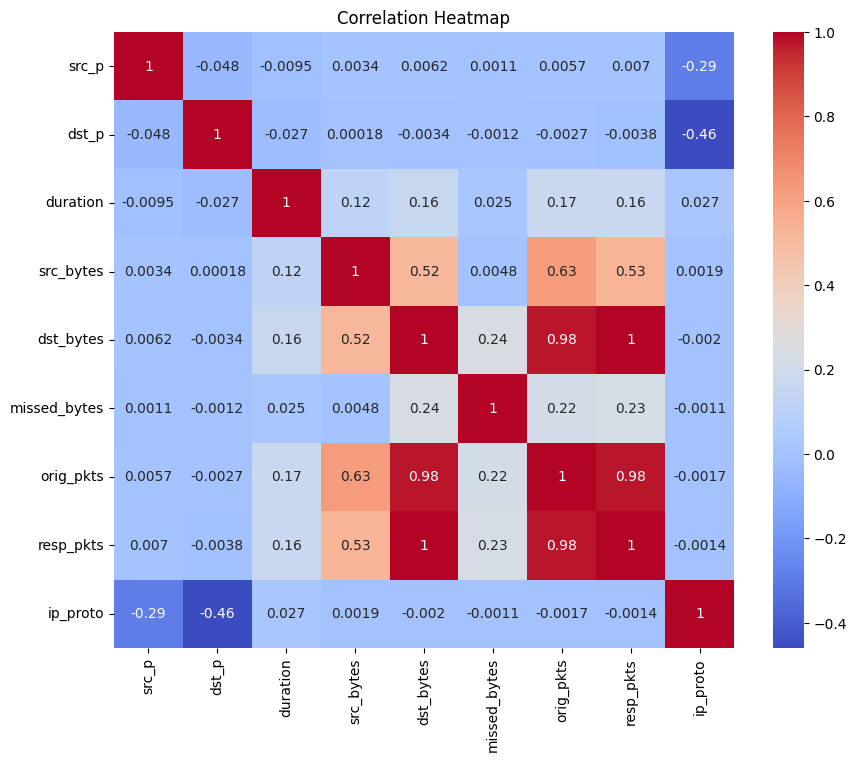

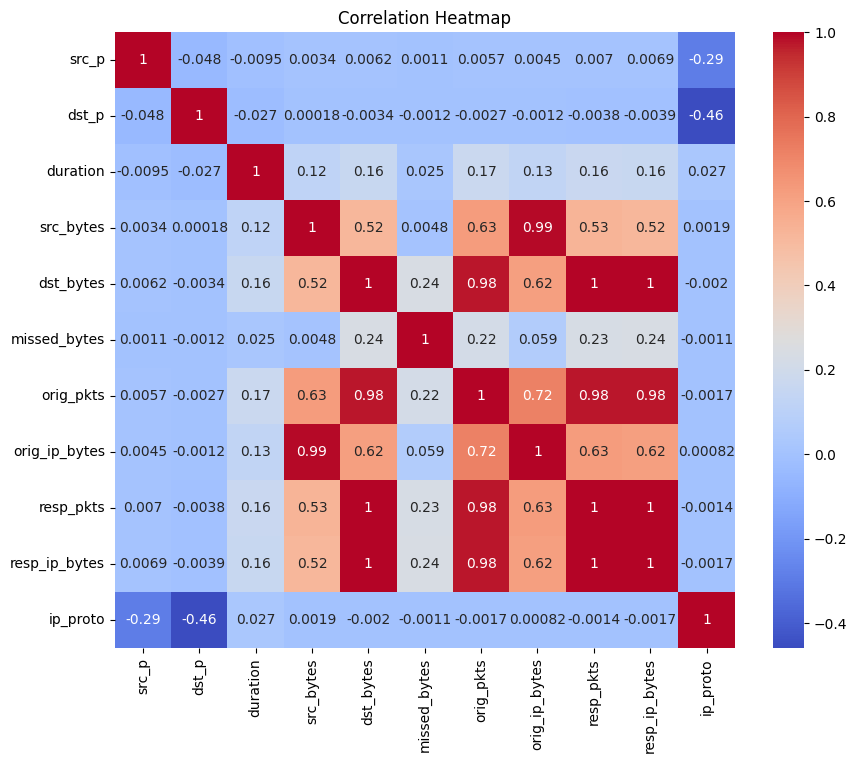

In [42]:
# HeatMap
temp = n_data.copy()
temp.drop(columns=['orig_ip_bytes', 'resp_ip_bytes'], inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(temp.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(n_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

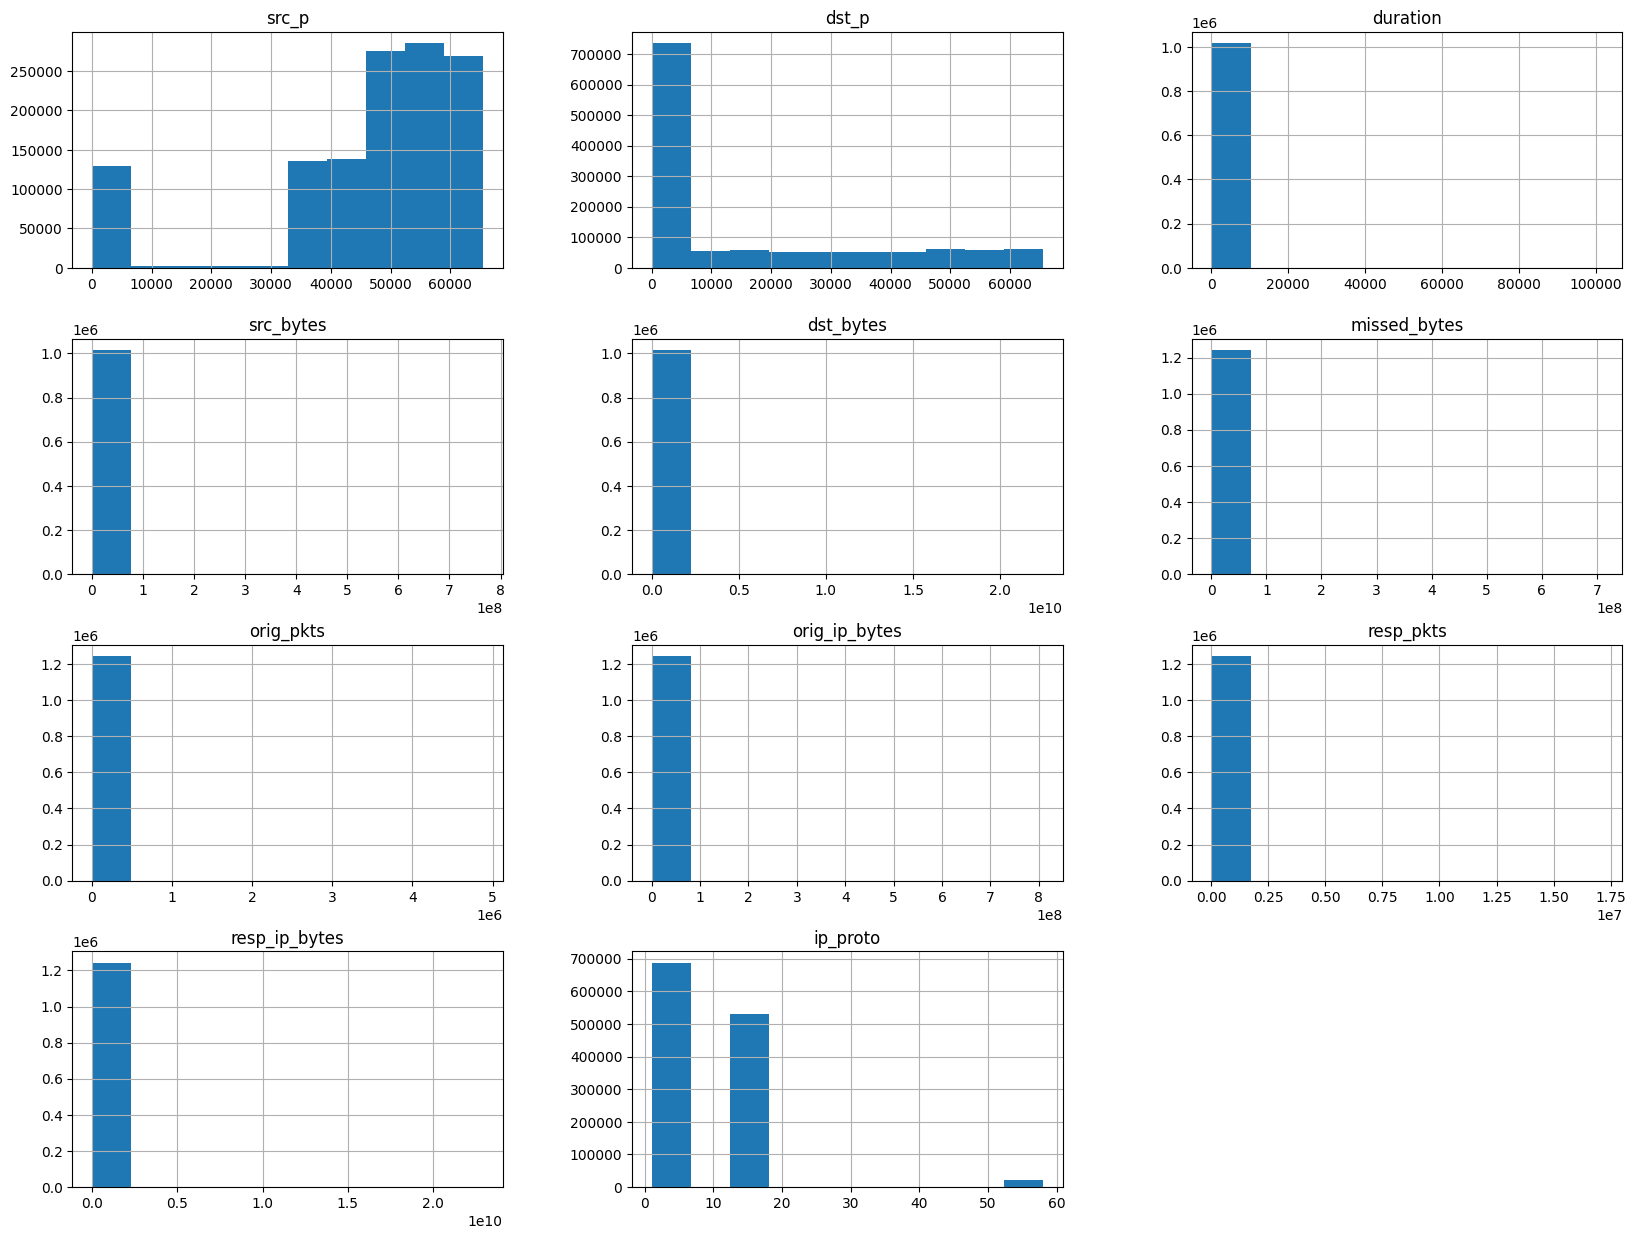

In [43]:
# Histogram
n_data.hist( figsize=(20, 15))
plt.show()

### Numerical Analysis (Results)
- Heatmap shows many correlated values, feature engineering needs to be considered
- Our histograms are as expected since given the dynamic nature and unique nature of network traffic

## All Data
- Total Data Aggregation

Unique SRC IP's IPs 479
Total Conenctions 1243021


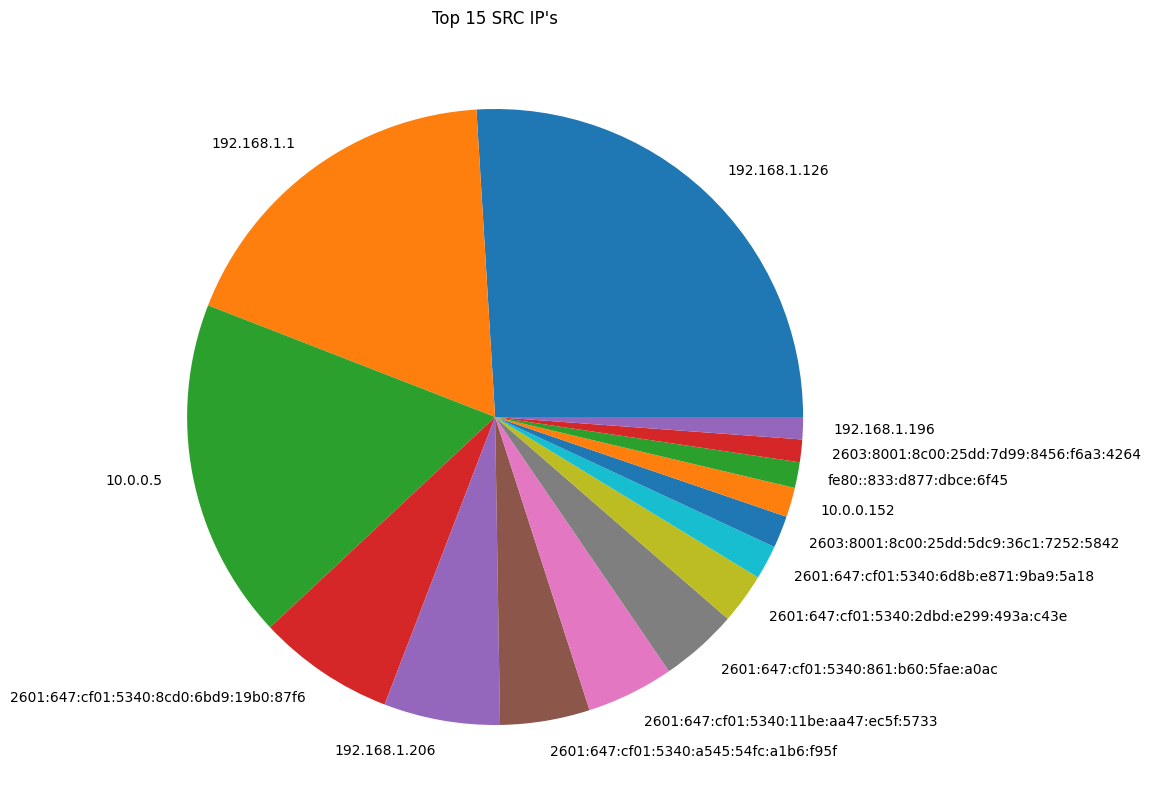

In [44]:
# General Stats
# Most Popular Src ip

def pie_graph(df, s, feature, bounds):
  ip_counts = df[feature].value_counts()[:bounds]
  labels = ip_counts.index
  values = ip_counts.values

  fig, ax = plt.subplots()
  ax.set_title(f'Top {bounds} {s}')
  fig.set_size_inches(10, 10)
  ax.pie(values, labels=labels);

  print(f'Unique {s} IPs', len(df[feature].value_counts()))
  print(f'Total Conenctions', len((df)))
  return


pie_graph(v_data, 'SRC IP\'s', 'src_ip', 15)

Unique SRC_PORTS IPs 33949
Total Conenctions 1243021


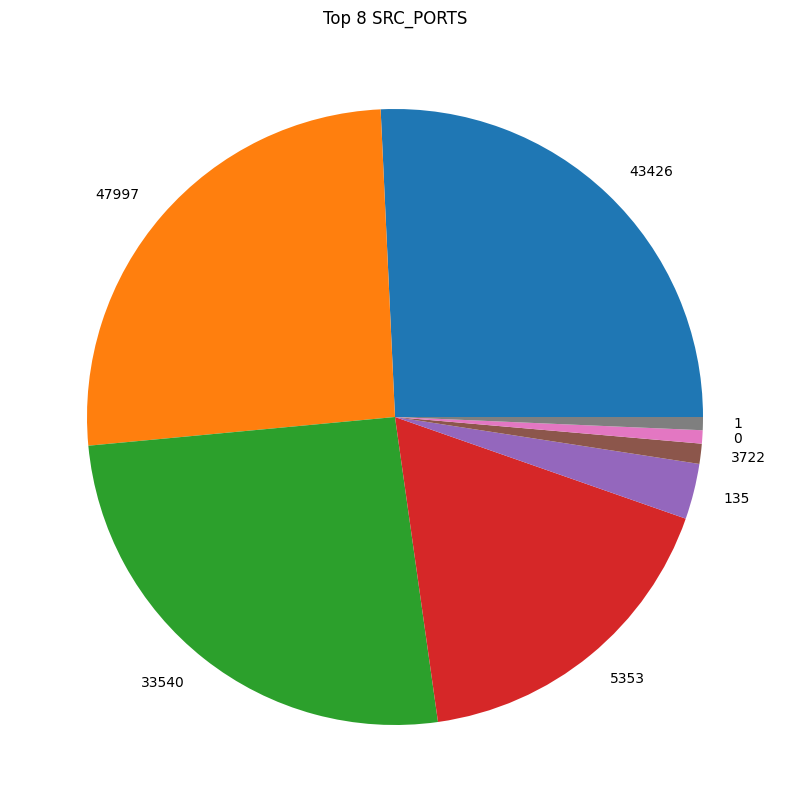

In [45]:
# Top src_port ip's
pie_graph(v_data, 'SRC_PORTS', 'src_p', 8)

Unique DST IP's IPs 8094
Total Conenctions 1243021


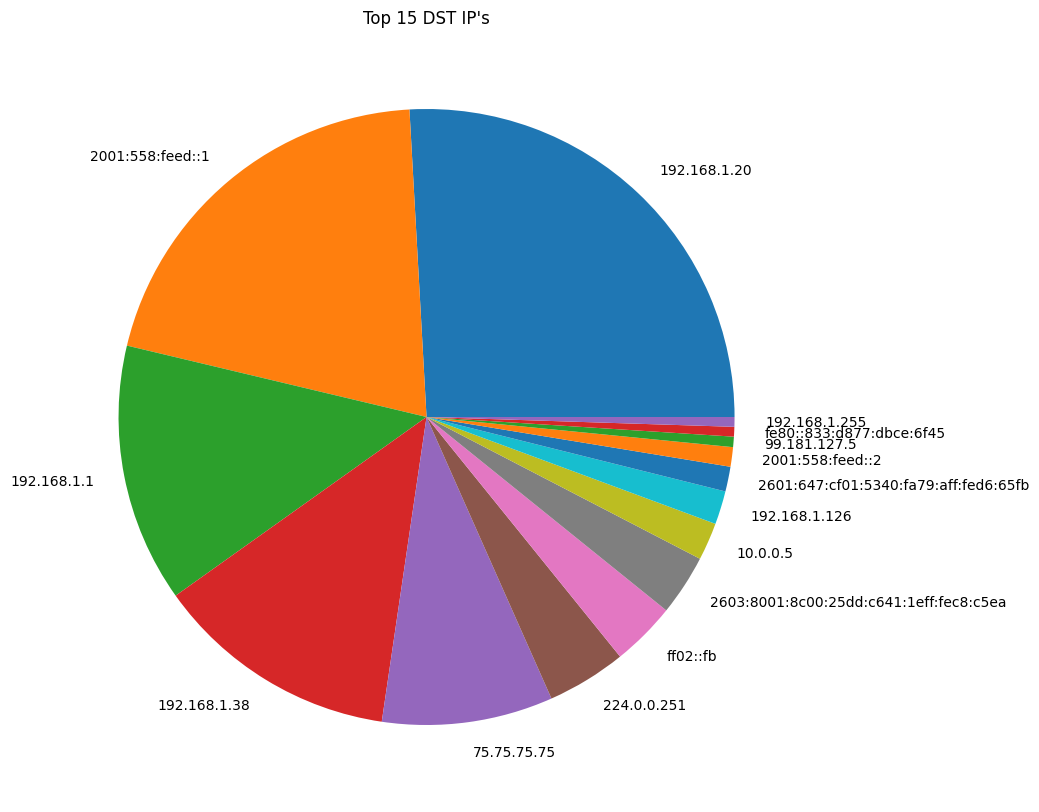

In [46]:
# Dst Ip's
pie_graph(v_data, 'DST IP\'s', 'dst_ip', 15)

Unique DST_PORTS IPs 65536
Total Conenctions 1243021


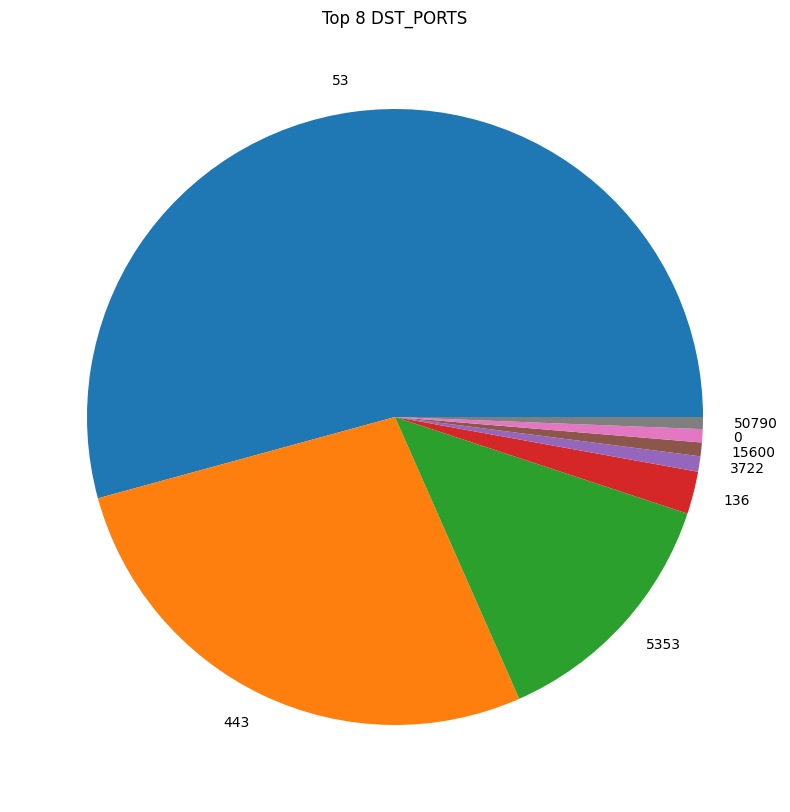

In [47]:
# Dst port
pie_graph(v_data, 'DST_PORTS', 'dst_p', 8)

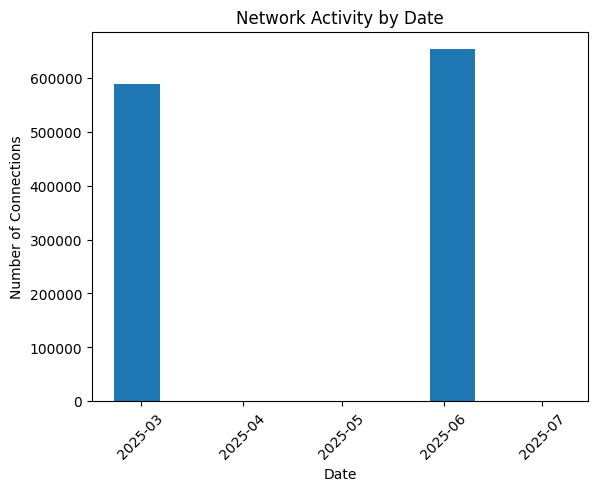

In [48]:
# Hist over time
plt.hist(v_data['ts'].dt.date, bins=10)  # Add bins for better visualization
plt.xlabel('Date')
plt.ylabel('Number of Connections')
plt.title('Network Activity by Date')
plt.xticks(rotation=45)
plt.show()

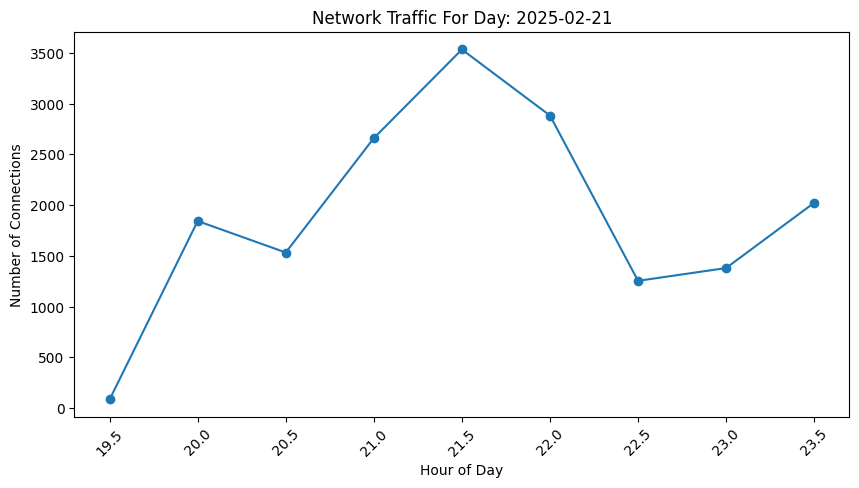

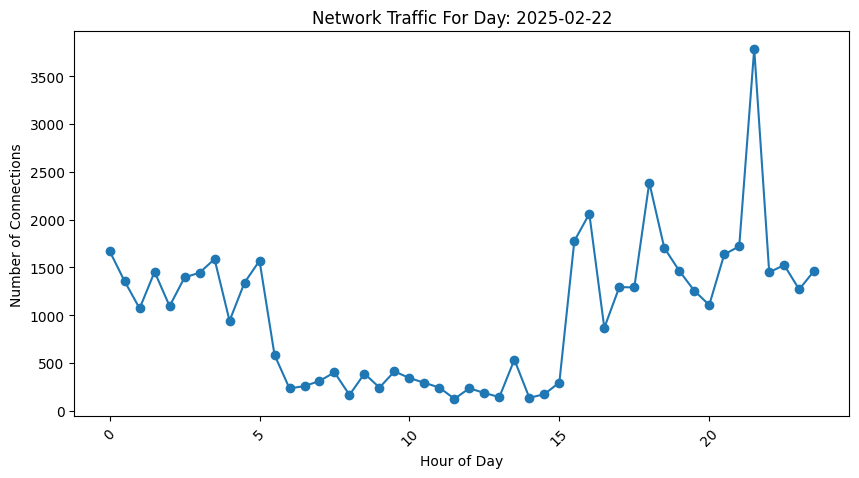

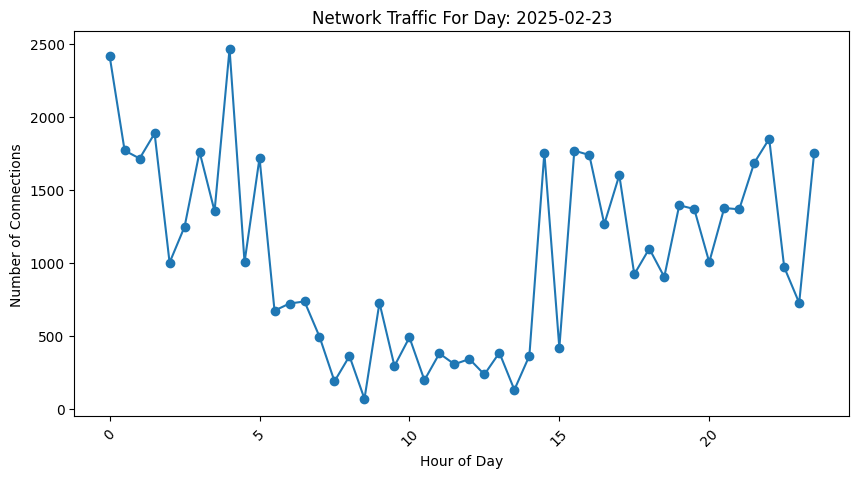

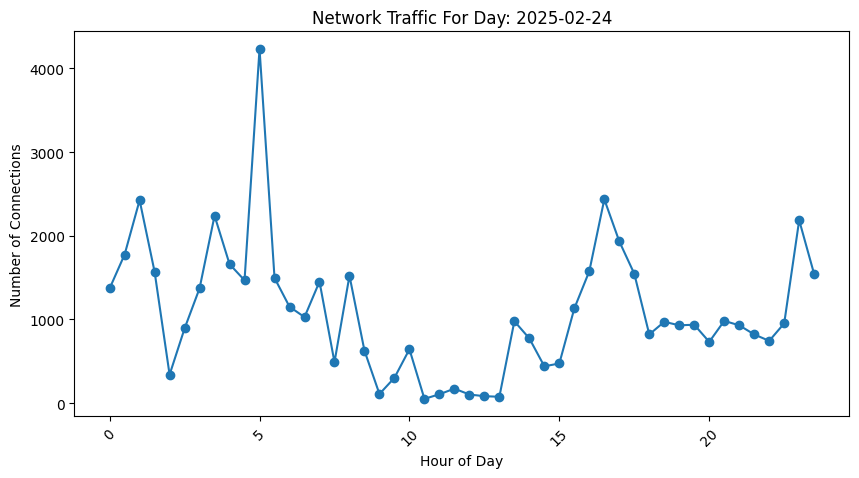

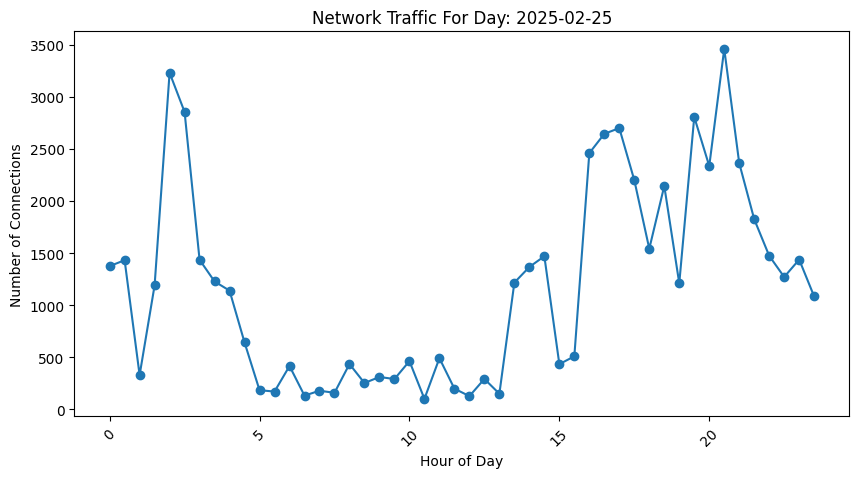

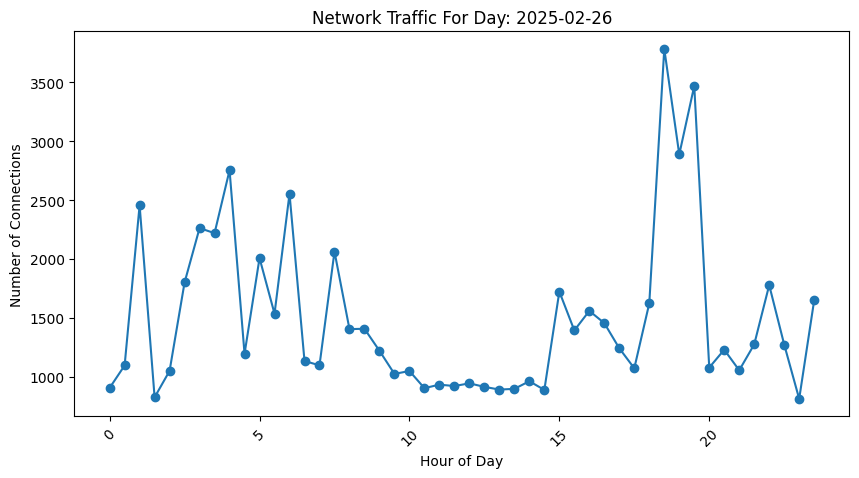

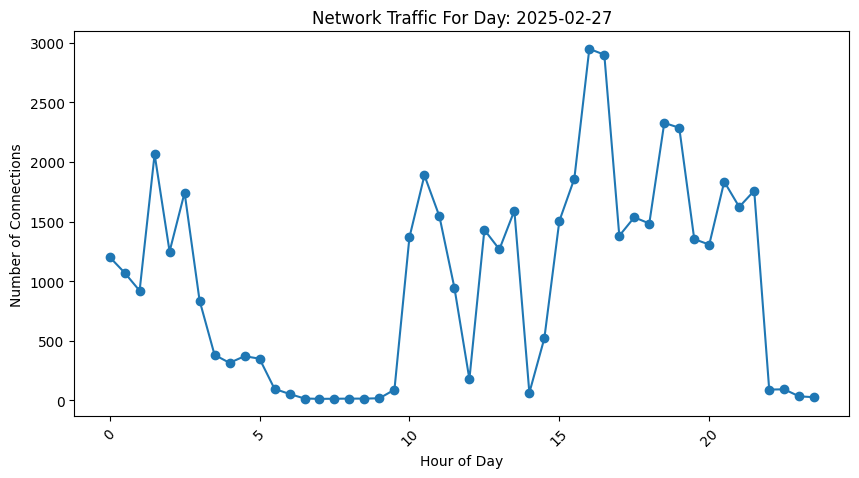

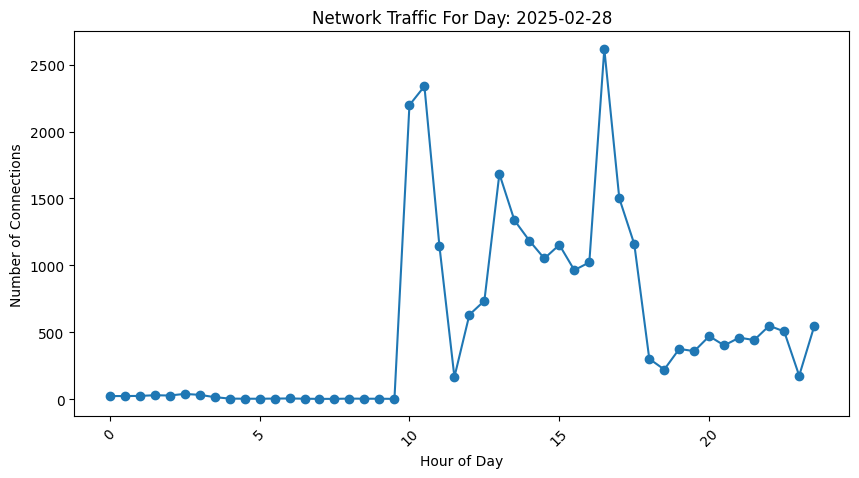

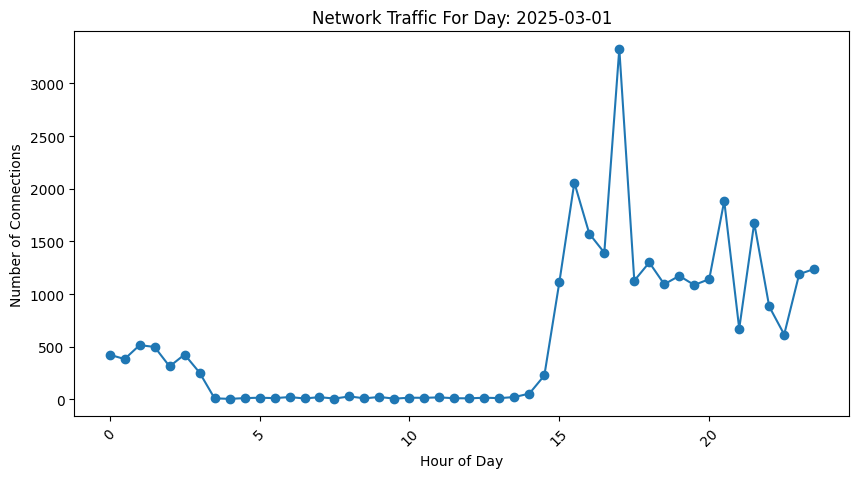

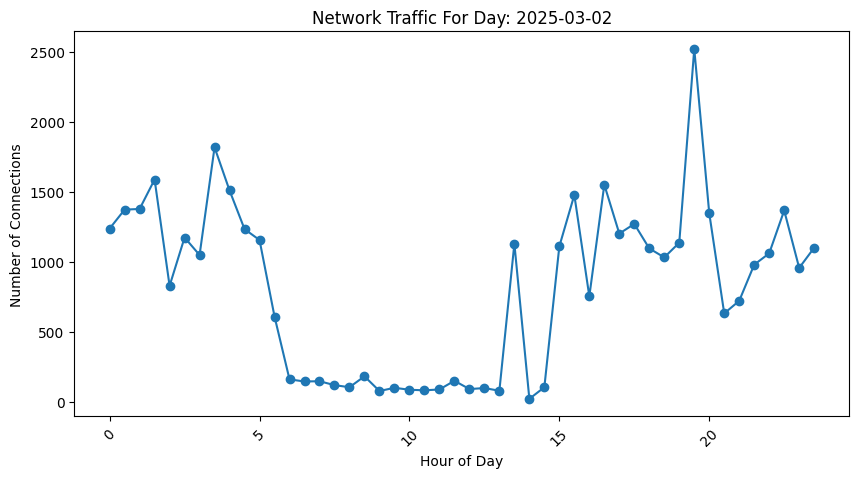

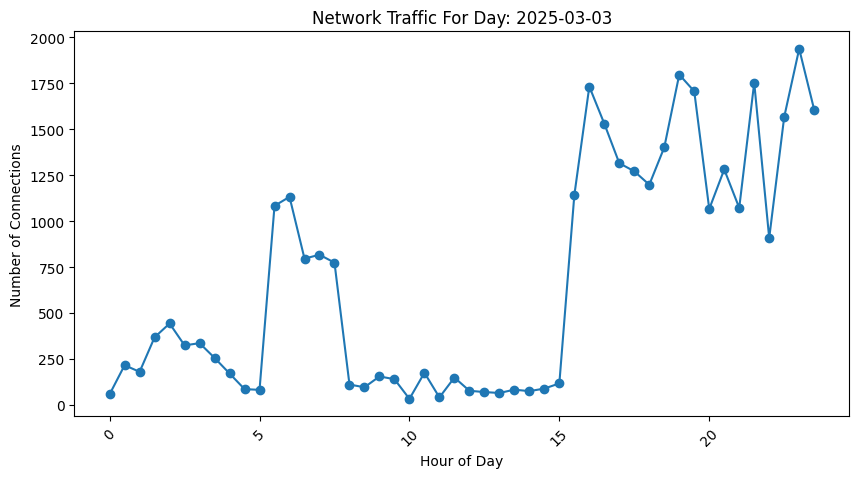

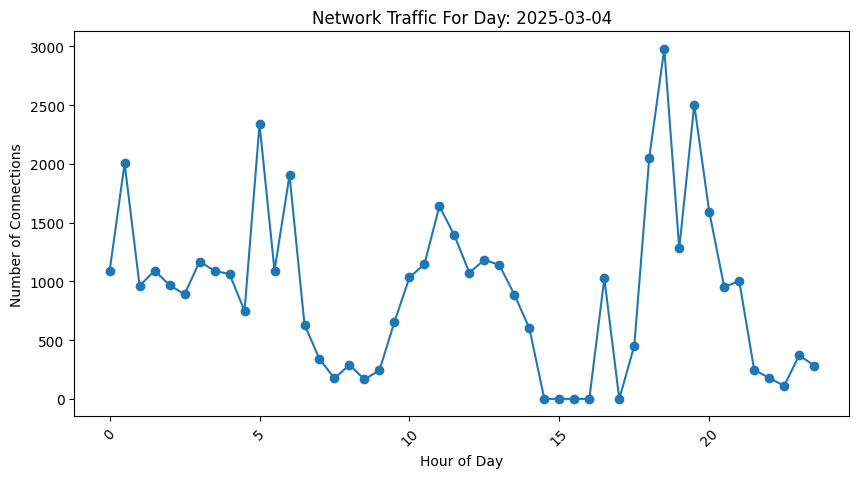

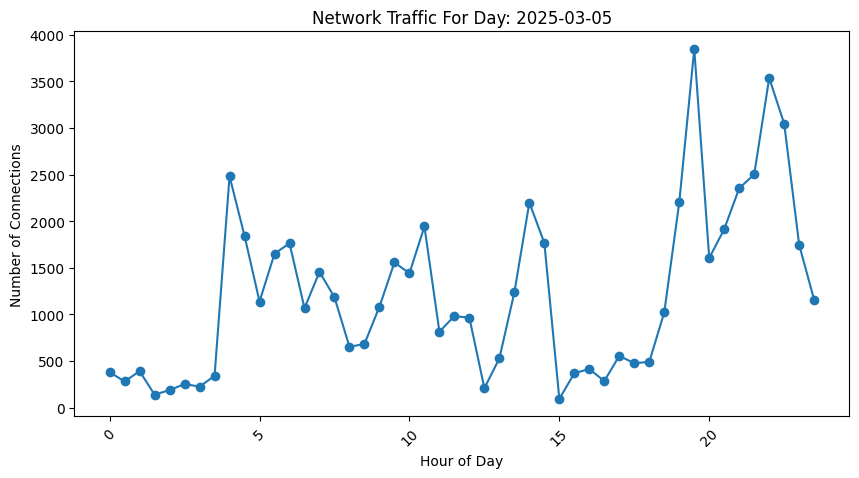

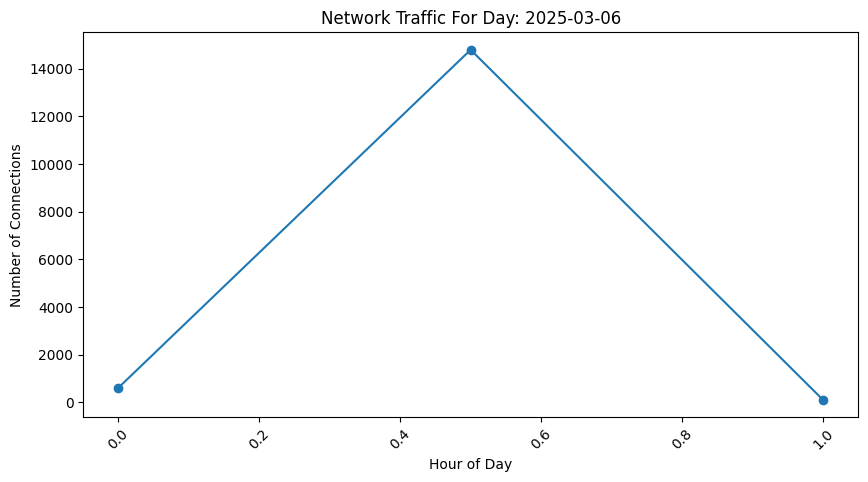

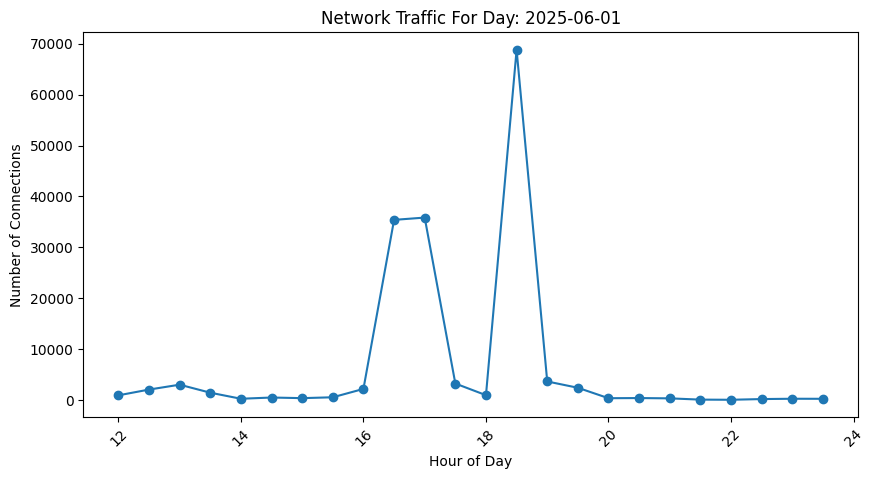

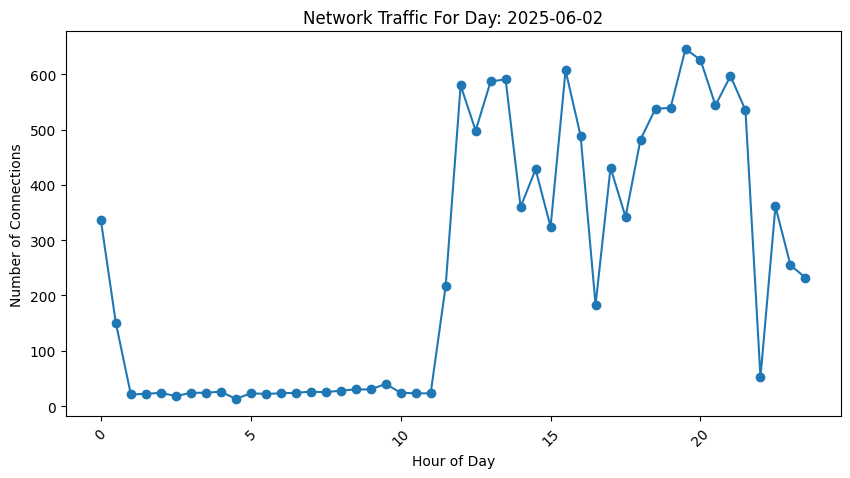

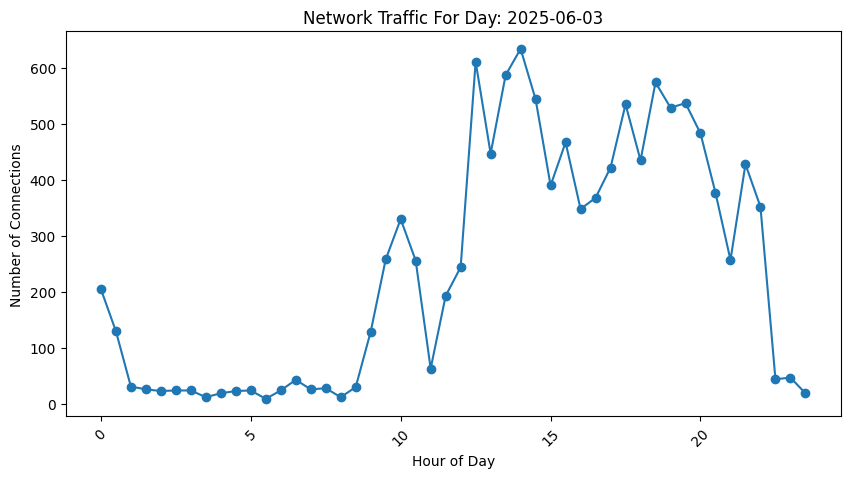

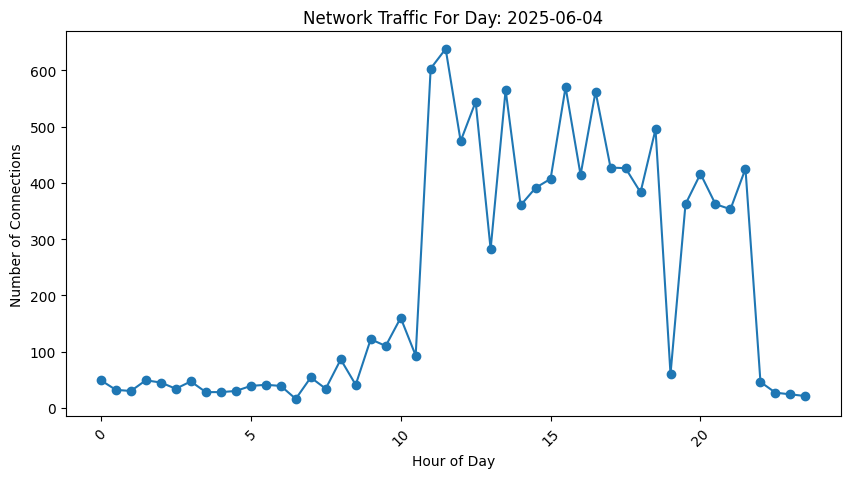

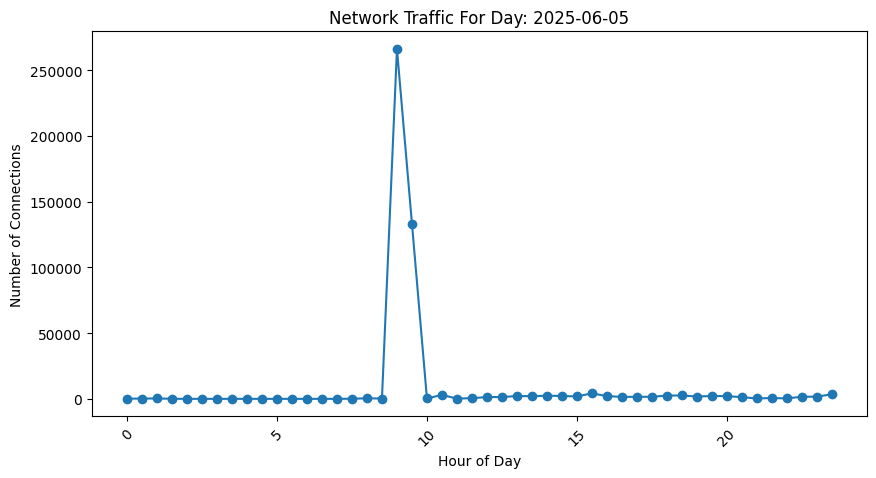

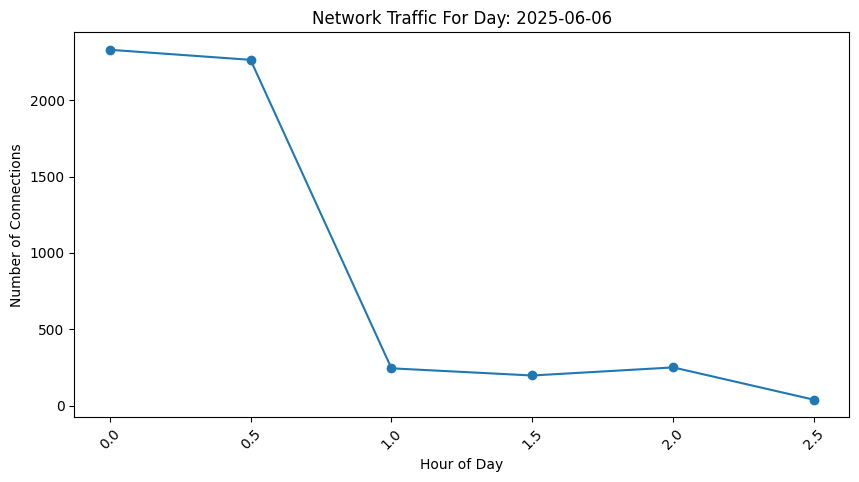

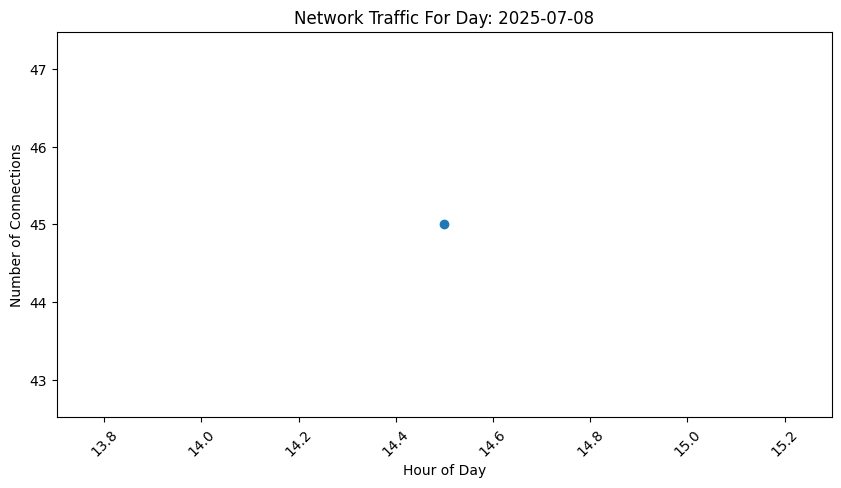

In [49]:
# By Day
mapping = {} # Timestamp to Size Mapping
count = 0
for group,value in v_data.groupby(pd.Grouper(key='ts', freq='D')):
  for groups,values in value.groupby(pd.Grouper(key='ts', freq='30min')):
      mapping[groups] = len(values)
df = pd.DataFrame(list(mapping.items()), columns=['Timestamp', 'Size'])
df
# Find how many unique days
# zeek_data['ts'].dt.date.nunique() = 14
length_ts = v_data['ts'].dt.date.nunique()

# See what dates are actually in each group
df['date'] = df['Timestamp'].dt.date
for date, day_data in df.groupby('date'):
  plt.figure(figsize=(10, 5))
  plt.title(f"Network Traffic For Day: {date}")
  plt.plot(day_data['Timestamp'].dt.hour + day_data['Timestamp'].dt.minute/60, day_data['Size'], 'o-')
  plt.xlabel('Hour of Day')
  plt.ylabel('Number of Connections')
  plt.xticks(rotation=45)
  plt.show()

Unique PROTOCOLS IPs 4
Total Conenctions 1243021


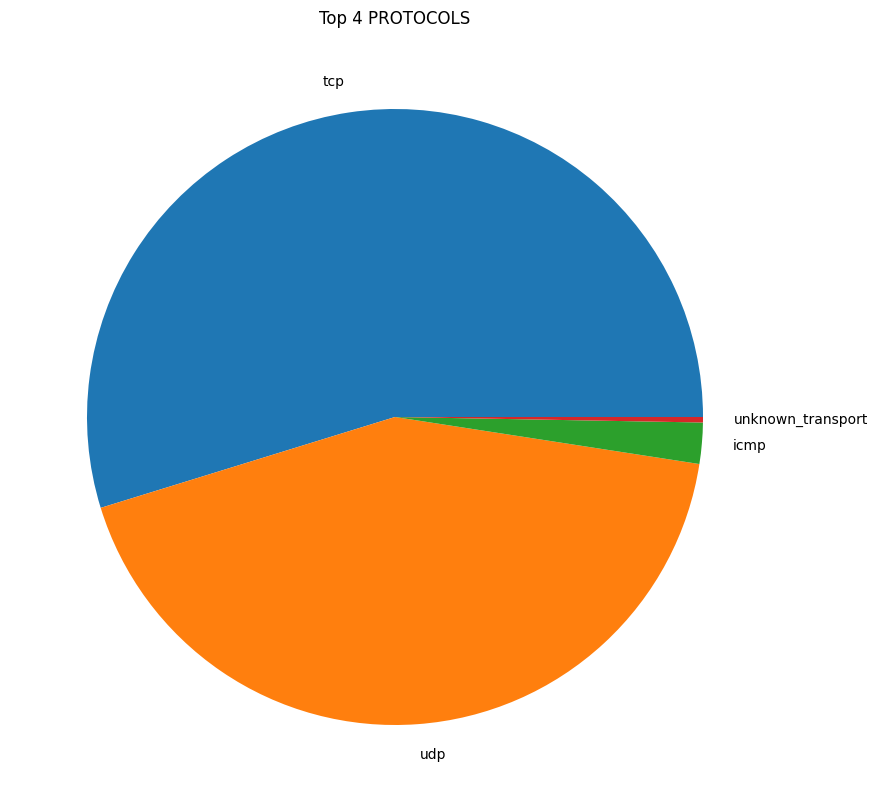

In [50]:
# Protocol Analysis
pie_graph(v_data, 'PROTOCOLS', 'proto', 4)

Unique SERVICES IPs 28
Total Conenctions 1243021
service
-                          628290
dns                        449981
ssl                        111516
quic,ssl                    21931
quic                        18347
ssl,quic                     5178
http                         4828
ntp                          1606
dhcp                          528
quic,ssl,ayiya                396
gssapi,ntlm,smb               118
ssl,quic,ayiya                 57
smb,gssapi,ntlm                46
ayiya                          38
ssl,http                       30
ayiya,quic                     30
ntlm,gssapi,smb                27
http,ssl                       14
smb,ntlm,gssapi                14
ftp                            10
ftp-data                       10
krb_tcp                        10
gssapi                          7
ssh                             3
dce_rpc,smb,gssapi,ntlm         2
ntlm                            2
dce_rpc,ntlm,smb,gssapi         1
mqtt                     

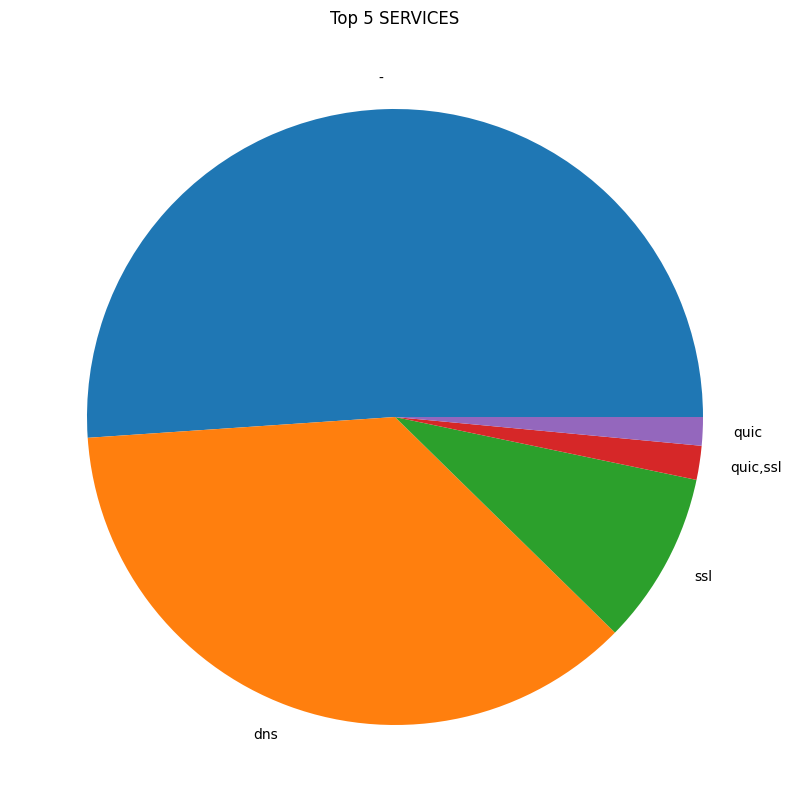

In [51]:
# Service Analysis
# "-" means unspecified i guess
pie_graph(v_data, 'SERVICES', 'service', 5)
print(v_data['service'].value_counts())

## Local Machine Analysis
- 10.0.0.5
- who was I talking too
- Most common dst and src ports

In [52]:
# Specific to my IP 10.0.0.5

local_machine_src = v_data[v_data['src_ip'] == '10.0.0.5']

local_machine_dst = v_data[v_data['dst_ip'] == '10.0.0.5']
local_machine_src

,ts,uid,src_ip,src_p,dst_ip,dst_p,proto,service,duration,src_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,ip_proto
0,2025-02-21 19:55:46.358164072-08:00,Covuo43LyFTNEu1Cp7,10.0.0.5,65430,99.181.107.78,443,tcp,-,0.176656,0.0,...,OTH,T,F,0,^dAtt,34,1876,169,237196,6
1,2025-02-21 19:55:46.358163118-08:00,CGgOtJ35xc6GxibRug,10.0.0.5,65289,140.82.112.26,443,tcp,-,0.089289,24.0,...,SF,T,F,0,^dADFaRfR,6,300,5,325,6
2,2025-02-21 19:56:08.851763010-08:00,CX6Ki51nhyiL2A6494,10.0.0.5,65430,99.181.107.78,443,tcp,-,0.213978,1544.0,...,OTH,T,F,0,^dAttDa,29,3088,120,161605,6
73,2025-02-21 19:59:59.631752968-08:00,CMj14C3tuqmS3dkMw,10.0.0.5,5353,224.0.0.251,5353,udp,dns,5.311252,726.0,...,S0,T,F,0,D,4,838,0,0,17
80,2025-02-21 20:00:23.387157917-08:00,CkSHsn1EsZ5iQqwiC,10.0.0.5,5353,224.0.0.251,5353,udp,dns,7.000262,740.0,...,S0,T,F,0,D,4,852,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589515,2025-03-06 01:00:09.712822914-08:00,Cg4Mqe3WejDvf7PfGa,10.0.0.5,50840,75.75.76.76,53,udp,dns,1.025913,74.0,...,S0,T,F,0,D,2,130,0,0,17
589516,2025-03-06 01:00:09.919981003-08:00,CsQvJa3bzfk3Lshpxl,10.0.0.5,55082,75.75.76.76,53,udp,dns,1.035272,96.0,...,S0,T,F,0,D,2,152,0,0,17
589517,2025-03-06 01:00:09.919929981-08:00,ChMSQw23HKndeSkrg4,10.0.0.5,62370,75.75.76.76,53,udp,dns,1.035291,100.0,...,S0,T,F,0,D,2,156,0,0,17
589518,2025-03-06 01:00:09.920011044-08:00,CH5m5CiRJYYw0GMIb,10.0.0.5,58060,75.75.76.76,53,udp,dns,1.035244,96.0,...,S0,T,F,0,D,2,152,0,0,17


Unique SRC PORTS when local machine is src IPs 17311
Total Conenctions 196023


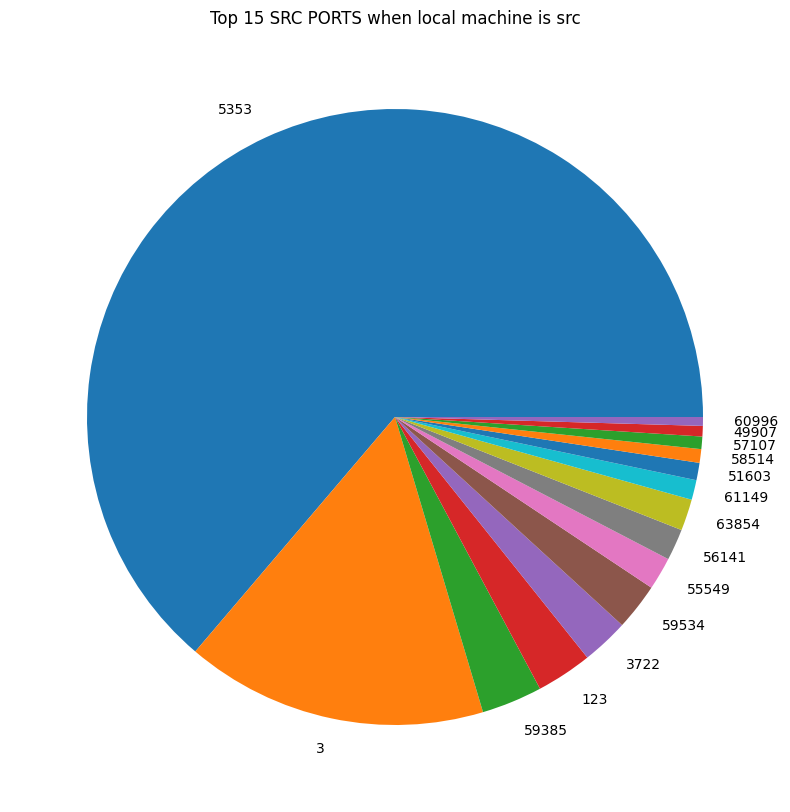

In [53]:
# most common src ports from '10.0.0.5'
pie_graph(local_machine_src, 'SRC PORTS when local machine is src', 'src_p', 15)

In [54]:
print(local_machine_src['src_p'].value_counts()[:15])
local_machine_src['src_p'].value_counts()

src_p
5353     4980
3        1237
59385     249
123       229
3722      192
59534     192
55549     134
56141     129
63854     129
61149      81
51603      71
58514      56
57107      51
49907      43
60996      36
Name: count, dtype: int64


,count
src_p,
5353,4980
3,1237
59385,249
123,229
3722,192
...,...
35789,1
35855,1
24005,1


In [55]:
# Interesting lets say who are we communicating to on port 5353 and 3
local_machine_src_p_5353 = local_machine_src[local_machine_src['src_p'] == 5353]
local_machine_src_p_3 = local_machine_src[local_machine_src['src_p'] == 3]

print(local_machine_src_p_5353['dst_ip'].value_counts())
print(local_machine_src_p_3['dst_ip'].value_counts())
print(len(local_machine_src_p_5353['dst_ip'].value_counts()))
print(local_machine_src_p_5353)

dst_ip
224.0.0.251       4418
10.0.0.23          278
10.0.0.208         156
10.0.0.228          70
10.0.0.152          13
10.0.0.192          12
10.0.0.65           11
172.16.64.1         10
192.168.120.1       10
169.233.141.36       2
Name: count, dtype: int64
dst_ip
75.75.75.75       427
75.75.76.76        72
104.21.90.38       35
172.67.152.110     26
35.186.224.24      24
                 ... 
109.176.239.69      1
172.67.175.10       1
142.251.46.228      1
34.49.241.189       1
104.22.68.95        1
Name: count, Length: 206, dtype: int64
10
                                        ts                 uid    src_ip  \
73     2025-02-21 19:59:59.631752968-08:00   CMj14C3tuqmS3dkMw  10.0.0.5   
80     2025-02-21 20:00:23.387157917-08:00   CkSHsn1EsZ5iQqwiC  10.0.0.5   
160    2025-02-21 20:03:45.662853003-08:00  C2ZShX3lqdNlPlCkQe  10.0.0.5   
167    2025-02-21 20:04:16.544559956-08:00  CsC80N36Ypuf2rWFJ1  10.0.0.5   
272    2025-02-21 20:09:08.650110960-08:00   CJrUKG3YSUGRhkm0s  10

In [56]:
# Really so only about 4k packets of 5353 out of 196k are the most common
# lets see how dyanmic the port ranges are
print(local_machine_src['src_p'].describe())
local_machine_src['dst_p'].describe()
# ok so after the output based on the mean src port being ~55k

count    196023.000000
mean      55174.709769
std       10949.250599
min           3.000000
25%       52574.000000
50%       56641.000000
75%       61051.500000
max       65535.000000
Name: src_p, dtype: float64


,dst_p
count,196023.000000
mean,487.549767
std,1873.276172
min,0.000000
25%,53.000000
50%,443.000000
75%,443.000000
max,65158.000000


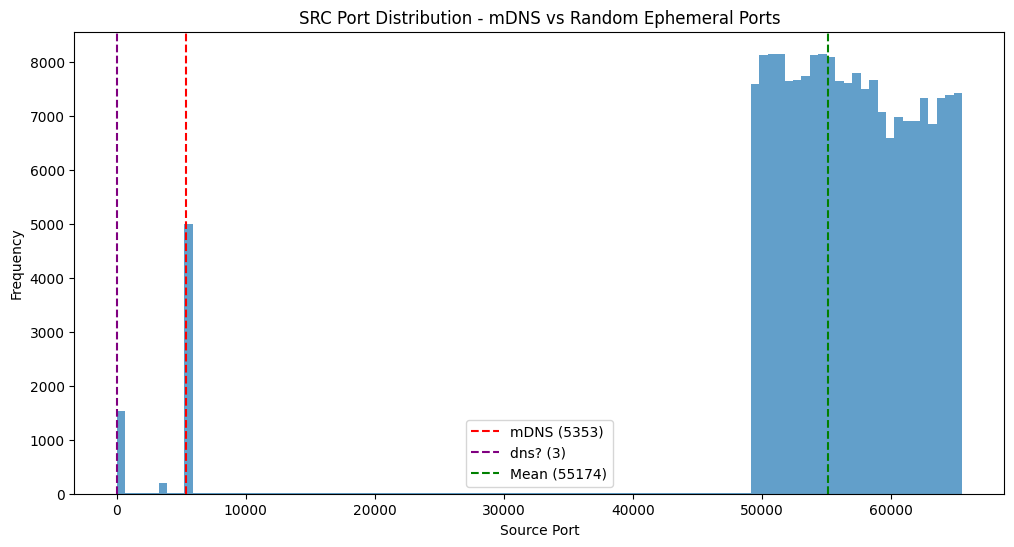

In [57]:
# Beautiful distribution, mdns 5353 is concentrated enough to be the most common yet 50000 - 65000 appear to be the most dense
plt.figure(figsize=(12, 6))
plt.hist(local_machine_src['src_p'], bins=100, alpha=0.7)
plt.axvline(x=5353, color='red', linestyle='--', label='mDNS (5353)')
plt.axvline(x=3, color='purple', linestyle='--', label='dns? (3)')
plt.axvline(x=55174, color='green', linestyle='--', label=f'Mean ({55174})')
plt.xlabel('Source Port')
plt.ylabel('Frequency')
plt.title('SRC Port Distribution - mDNS vs Random Ephemeral Ports')
plt.legend()
plt.show()

Unique DST PORTS when local machine is src IPs 74
Total Conenctions 196023


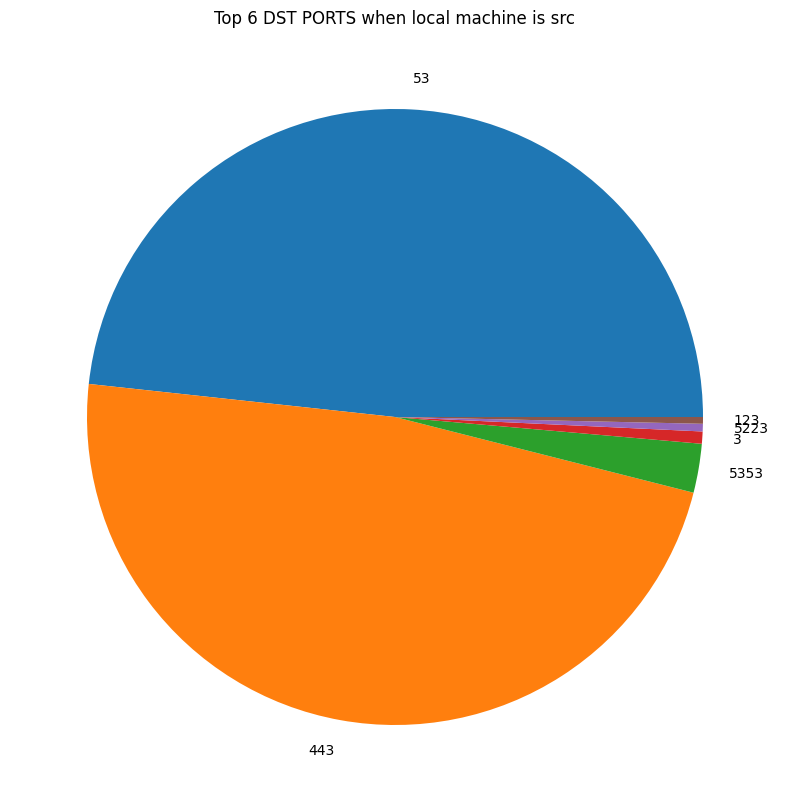

In [58]:
# ok now lets check out who we are sending data too source port then well hit ip's protocols etc
# most common dst ports from '10.0.0.5'
# Who are we sending data too? and what service is it?
pie_graph(local_machine_src, 'DST PORTS when local machine is src', 'dst_p', 6)


In [59]:
# Cool, lets get a more numerical approach to see how it compares to our src port analysis:
print(local_machine_src['dst_p'].value_counts()[:6])
len(local_machine_src['dst_p'].value_counts())

# Very interesting results, makes sense for client ports are a lot more dynamic, and server port numbers are quite static which makes sense and still cool to see

dst_p
53      93714
443     92685
5353     4980
3        1237
5223      773
123       682
Name: count, dtype: int64


74

Unique DST IP's when local machine is src IPs 4245
Total Conenctions 196023


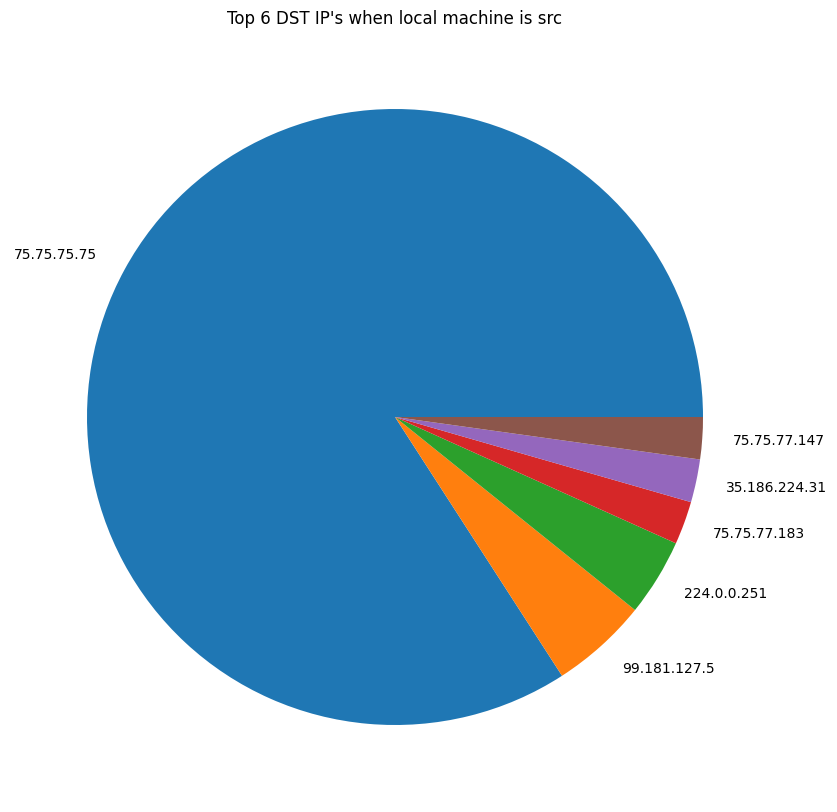

In [60]:
# now lets get to IP'S lets start with who our dst ip is:
# ok now lets check out who we are sending data too source port then well hit ip's protocols etc
# most common dst ports from '10.0.0.5'
pie_graph(local_machine_src, 'DST IP\'s when local machine is src', 'dst_ip', 6)


In [61]:
local_machine_src['dst_ip'].value_counts()[:6]
# I don't know many of these ip's due to being hide behind a cloud platform like google, or being unresolvable

,count
dst_ip,
75.75.75.75,91685
99.181.127.5,5558
224.0.0.251,4418
75.75.77.183,2471
35.186.224.31,2457
75.75.77.147,2402


In [62]:
temp = local_machine_src[local_machine_src['dst_ip'] == '75.75.77.183']
# Not sure what this ip is its not resolvable via dns, but give a 400 when i try to connect via https

Unique SRC PORTS when local machine is dst IPs 4875
Total Conenctions 20190


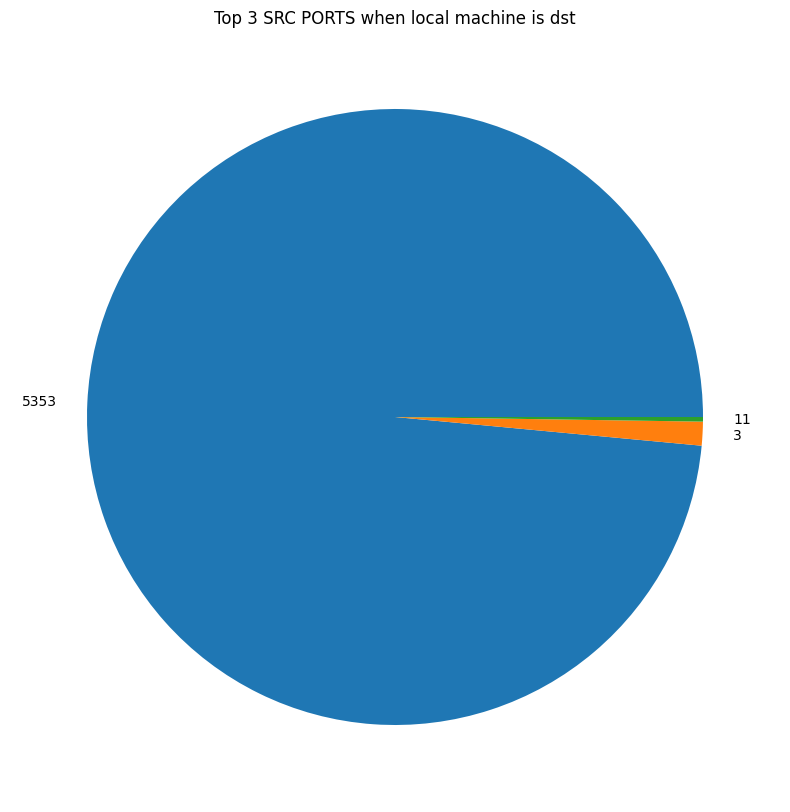

In [63]:
# Now lets analyze the data we recieved!
# What is the port that another user sent data on to our machine
pie_graph(local_machine_dst, 'SRC PORTS when local machine is dst', 'src_p', 3)

In [64]:
# Its all local data!
local_machine_dst['src_ip'].value_counts()

,count
src_ip,
10.0.0.152,12955
10.0.0.208,2774
10.0.0.192,1994
10.0.0.151,1061
10.0.0.23,835
10.0.0.6,517
10.0.0.228,12
10.0.0.1,5
10.0.0.65,3


Unique DST PORTS when local machine is dst IPs 72
Total Conenctions 20190


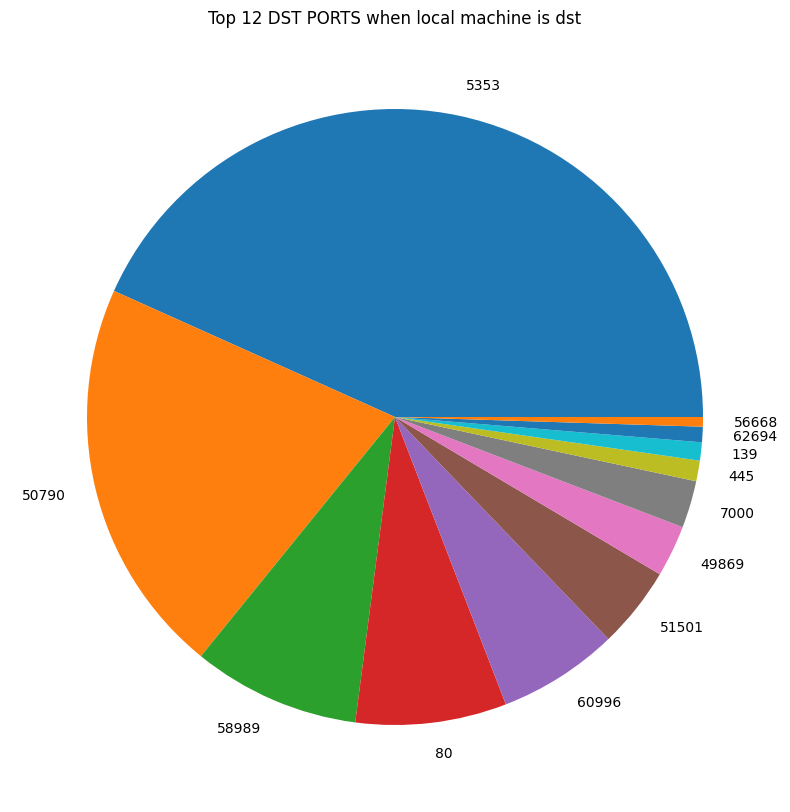

In [65]:
# Let's see what ports i recieved data on
# Now lets analyze the ports we recieved the data on!
pie_graph(local_machine_dst, 'DST PORTS when local machine is dst', 'dst_p', 12)



Unique SRC IP's when local machine is dst IPs 32
Total Conenctions 20190


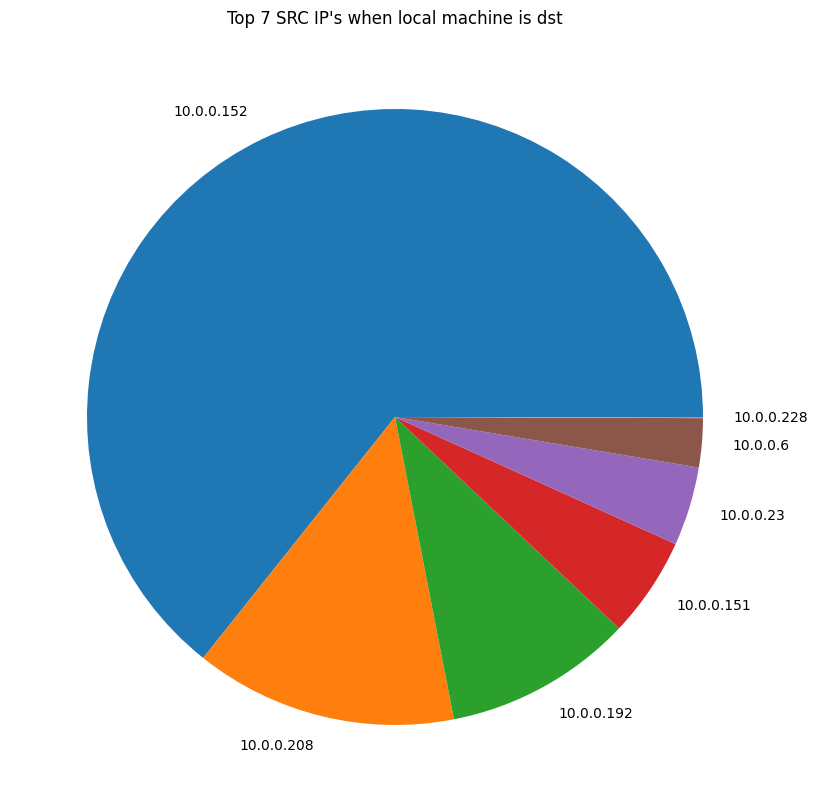

In [66]:
# Lets chec most common ip's that queried my machine!
pie_graph(local_machine_dst, 'SRC IP\'s when local machine is dst', 'src_ip', 7)

In [67]:
# Pickle v_data
# visualization data

PICKLE_FILE_PATH = os.path.join(PATH, "v_data.pkl")
print(f"\nSaving Dataframe to {PICKLE_FILE_PATH}")
v_data.to_pickle(PICKLE_FILE_PATH)
print("\n Pickled Saved!")



Saving Dataframe to /content/drive/MyDrive/IDS/pkl/v_data.pkl

 Pickled Saved!


In [68]:
# Pickle numerical visualization data
PICKLE_FILE_PATH = os.path.join(PATH, "n_data.pkl")
print(f"\nSaving Dataframe to {PICKLE_FILE_PATH}")
n_data.to_pickle(PICKLE_FILE_PATH)
print("\n Pickled Saved!")


Saving Dataframe to /content/drive/MyDrive/IDS/pkl/n_data.pkl

 Pickled Saved!


In [69]:
# Take out orig_ip_bytes resp_ip_bytes
# bytes_per_packet_orig = orig_bytes / orig_pkts
# bytes_per_packet_resp = resp_bytes / resp_pkts